In [22]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import pearsonr

In [23]:
# Carregando Dataset para as analises

data = pd.read_csv(r'C:\Users\Thiag\Documents\Data_analytics\Projetos Data\Projetos\project_enem\data\processed\02_feature-engineering_data.csv',
            encoding='utf-8',
            index_col='NU_INSCRICAO'
            )

In [24]:
# Ajustando Display para melhor visualização dos dados

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [25]:
# Verificando os dados

print(data.info(),
      '''

========================

      ''',
        data.describe().round(2).transpose(),
         '''

========================

      ''', 
      data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 2678264 entries, 210061103945 to 210061932304
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   tipo_faixa_etaria             int64  
 1   tipo_sexo                     object 
 2   tipo_estado_civil             int64  
 3   tipo_cor_raca                 object 
 4   tipo_nacionalidade            object 
 5   tipo_conclusao                int64  
 6   ano_de_concusao               int64  
 7   tipo_escola                   object 
 8   tipo_treineiro                object 
 9   regiao                        object 
 10  uf_prova                      object 
 11  municipio_prova               object 
 12  q01_escolaridade_pai          float64
 13  q02_escolaridade_mae          float64
 14  q03_ocupacao_pai              object 
 15  q04_ocupacao_mae              object 
 16  q05_pessoas_residencia        int64  
 17  q06_renda_familiar            int64  
 18  renda_per_c

In [26]:
# Dando uma olhada geral nos dados

data.sample(10)

,tipo_faixa_etaria,tipo_sexo,tipo_estado_civil,tipo_cor_raca,tipo_nacionalidade,tipo_conclusao,ano_de_concusao,tipo_escola,tipo_treineiro,regiao,uf_prova,municipio_prova,q01_escolaridade_pai,q02_escolaridade_mae,q03_ocupacao_pai,q04_ocupacao_mae,q05_pessoas_residencia,q06_renda_familiar,renda_per_capita,faixa_renda_per_capita,q07_empregado_domestico,q08_tem_banheiro,q09_qtd_quartos,q10_tem_carro,q11_tem_motocicleta,q12_tem_geladeira,q13_tem_freezer,q14_tem_maquina_lavar_roupa,q15_tem_maquina_secar_roupa,q17_tem_maquina_lavar_louca,q16_tem_microondas,q18_tem_aspirador_po,q19_tem_tv_cores,q20_tem_dvd,q21_tem_tv_assinatura,q23_tem_telefone_fixo,q22_tem_celular,q24_tem_computador,q25_tem_internet,indice_tecnologico,indice_eletrodomesticos,indice_transporte,indice_estrutura_casa,indice_escolaridade_pais,indice_max_escolaridade_pais,lingua_estrangeira,status_redacao,nota_cn,nota_ch,nota_lc,nota_mt,nota_red_comp1,nota_red_comp2,nota_red_comp3,nota_red_comp4,nota_red_comp5,nota_redacao,nota_media_geral
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
210061462874,11,Feminino,0,Branca,Brasileiro(a),4,0,Não Respondeu,Não é treineiro,Sul,RS,Capão do Leão,2.00,2.00,C,F,3,1,220.00,1,0,1,2,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,3,3,0,3,4.00,2.00,Espanhol,Sem problemas,502.10,480.30,520.80,396.80,100.00,120.00,80.00,100.00,40.00,440.00,475.00
210059916397,3,Feminino,1,Branca,Brasileiro(a),2,0,Pública,Não é treineiro,Sul,SC,Criciúma,4.00,4.00,C,B,3,5,1210.00,4,0,3,3,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,1,4,5,1,6,8.00,4.00,Espanhol,Sem problemas,512.00,522.80,556.70,490.90,160.00,180.00,160.00,200.00,200.00,900.00,520.60
210058175274,2,Feminino,1,Branca,Brasileiro(a),2,0,Pública,Não é treineiro,Sul,RS,São Borja,5.00,6.00,B,D,3,7,1980.00,5,1,3,3,1,0,2,2,1,0,0,1,1,4,1,0,0,4,2,1,12,7,1,7,11.00,6.00,Inglês,Sem problemas,502.90,602.50,655.80,590.60,160.00,200.00,140.00,200.00,200.00,900.00,588.00
210058680977,1,Feminino,1,Branca,Brasileiro(a),3,0,Não Respondeu,É treineiro,Sul,PR,Curitiba,NaN,4.00,F,B,3,5,1210.00,4,0,2,3,2,0,1,1,1,1,0,1,0,3,0,1,0,3,2,1,10,5,2,5,4.00,4.00,Inglês,Sem problemas,532.40,490.10,549.30,576.80,160.00,200.00,140.00,120.00,120.00,740.00,537.20
210059404276,3,Feminino,1,Branca,Brasileiro(a),4,1,Não Respondeu,Não é treineiro,Sudeste,SP,Itapeva,2.00,5.00,E,E,4,10,2475.00,6,3,3,3,3,1,3,2,2,1,0,1,1,2,0,1,0,4,1,1,9,10,4,9,7.00,5.00,Espanhol,Sem problemas,592.60,324.30,599.60,679.90,140.00,120.00,120.00,140.00,40.00,560.00,549.10
210061626677,1,Masculino,1,Parda,Brasileiro(a),3,0,Não Respondeu,É treineiro,Sudeste,MG,Betim,6.00,6.00,F,D,6,1,110.00,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,4,1,0,3,12.00,6.00,Espanhol,Sem problemas,421.60,459.60,431.10,420.70,120.00,120.00,120.00,120.00,100.00,580.00,433.30
210061276816,3,Feminino,1,Branca,Brasileiro(a),2,0,Privada,Não é treineiro,Sudeste,SP,Botucatu,3.00,4.00,D,D,3,13,4840.00,8,0,3,3,1,0,2,2,2,0,0,1,1,4,0,1,0,4,1,1,11,8,1,6,7.00,4.00,Inglês,Sem problemas,577.90,571.10,609.50,677.50,160.00,40.00,80.00,160.00,120.00,560.00,609.00
210058346792,1,Feminino,0,Branca,Brasileiro(a),3,0,Não Respondeu,É treineiro,Sudeste,MG,Brumadinho,2.00,5.00,C,B,3,3,770.00,3,0,1,2,0,0,1,1,1,1,0,1,0,1,1,0,0,3,0,1,6,5,0,3,7.00,5.00,Inglês,Sem problemas,509.90,488.20,462.10,439.60,100.00,180.00,120.00,140.00,160.00,700.00,474.90
210061545698,2,Feminino,1,Branca,Brasileiro(a),2,0,Pública,Não é treineiro,Sul,PR,Ibaiti,NaN,4.00,F,B,3,4,990.00,3,0,1,2,2,0,1,1,1,0,0,0,1,1,0,1,0,3,0,1,6,4,2,3,4.00,4.00,Inglês,Sem problemas,559.80,619.70,603.20,688.50,140.00,120.00,120.00,120.00,80.00,580.00,617.80


*Análise Univariada Representatividade - Respresentatividade*


📈 DESEMPENHO

Var (Numerica Ordinal)
nota_cn, nota_ch, nota_lc, nota_mt
nota_redacao, nota_media_geral
______________________________________
👤 PERFIL DEMOGRÁFICO

Var (Numerica Discreta)
tipo_faixa_etaria

Var (Categorica)
tipo_sexo, tipo_cor_raca, regiao
______________________________________
🏫 CONTEXTO EDUCACIONAL (importantes - 3 colunas)

Var (Numerica Discreta)
tipo_conclusao

Var (Categorica)
tipo_escola, tipo_treineiro
______________________________________
💰 SOCIOECONÔMICO

Var (Numerica Discreta)
q06_renda_familiar, indice_escolaridade_pais
indice_tecnologico, indice_estrutura_casa
______________________________________
📍 GEOGRÁFICO (se relevante - 2 colunas)

Var (Categorica)
'regiao', 'uf_prova'

In [27]:
# Estilisando os graficos Seaborn
sns.set_style("whitegrid")      # Estilo: whitegrid, darkgrid, white, dark, ticks
sns.set_palette("husl")         # Paleta de cores
sns.set_context("notebook")     # Contexto: paper, notebook, talk, poster

In [28]:
# Criando listas das colunas analisadas por tipo de var

# Variáveis CONTÍNUAS (notas)
col_var_continuas = ['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao', 'nota_media_geral']

# Variáveis DISCRETAS (índices, categorias numéricas)
col_var_discretas = ['faixa_renda_per_capita', 'q06_renda_familiar',  'indice_tecnologico', 'indice_escolaridade_pais', 'indice_max_escolaridade_pais', 'indice_estrutura_casa', 'tipo_faixa_etaria']

# Criando dicionario com tipos de variaveis
disc_tipos_var = {
    'nota_cn'                           :'continua', 
    'nota_ch'                           :'continua', 
    'nota_lc'                           :'continua', 
    'nota_mt'                           :'continua', 
    'nota_redacao'                      :'continua', 
    'nota_media_geral'                  :'continua',
    'q06_renda_familiar'                :'discreta',
    'faixa_renda_per_capita'            :'discreta',
    'indice_tecnologico'                :'discreta', 
    'indice_escolaridade_pais'          :'discreta',
    'indice_max_escolaridade_pais'      :'discreta',
    'indice_estrutura_casa'             :'discreta', 
    'tipo_faixa_etaria'                 :'discreta'
}

In [29]:
# Criando função para analise univariadas

def univariate_analysis(lista_colunas, data):
    
    for col in lista_colunas:


        if disc_tipos_var[col] == 'continua':
        #________________________________________________________________
            """
            Função para análise univariada das variaveis continuas
            
            Parameters:
            lista_colunas: list - Lista com nomes das colunas numéricas
            data: DataFrame - Dataset com os dados
            """

        # Calculando estatísticas para anotação
            q1 = data[col].quantile(0.25)
            median = data[col].median()
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_fence = q1 - 1.5 * iqr
            upper_fence = q3 + 1.5 * iqr
            
            # Ajustando para valores reais nos dados
            actual_min = data[col].min()
            actual_max = data[col].max()
            lower_whisker = data[col][data[col] >= lower_fence].min()
            upper_whisker = data[col][data[col] <= upper_fence].max()

            # Configurando a figura
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            fig.suptitle(f'Análise Univariada - {col.replace("_", " ").title()} (Continua)', 
                        fontsize=18, fontweight='bold', y=0.98)

            # .ravel transforma o axes que é 2d e 1d
            axes = axes.ravel() 

            #__________________________________________________________________________________________
            # Gráfico 1: Histograma
            sns.histplot(data=data, 
                        x=col, 
                        ax=axes[0], 
                        kde=True, 
                        bins=30,
                        color='darkblue',
                        alpha=0.7)
            

            #__________________________________________________________________________________________
            # Gráfico 2: Boxplot com anotações
            box_plot = sns.boxplot(data=data,
                                ax=axes[1],
                                x=col,
                                color='lightcoral',
                                width=0.6)
            
            # Adicionando anotações no boxplot
            # Posição Y para as anotações (um pouco acima do boxplot)
            y_pos = 0.1
            
            # Anotações dos quartis e mediana
            axes[1].annotate(f'Q1: {q1:.1f}', 
                            xy=(q1, y_pos), 
                            xytext=(q1, y_pos + 0.15),
                            ha='center', va='bottom',
                            fontsize=9, fontweight='bold',
                            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
                            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='red', alpha=0.8))
            
            axes[1].annotate(f'Mediana: {median:.1f}', 
                            xy=(median, y_pos), 
                            xytext=(median, y_pos + 0.25),
                            ha='center', va='bottom',
                            fontsize=9, fontweight='bold',
                            arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2),
                            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='darkgreen', alpha=0.8))
            
            axes[1].annotate(f'Q3: {q3:.1f}', 
                            xy=(q3, y_pos), 
                            xytext=(q3, y_pos + 0.15),
                            ha='center', va='bottom',
                            fontsize=9, fontweight='bold',
                            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
                            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='red', alpha=0.8))
            
            # Anotações dos whiskers
            axes[1].annotate(f'Min: {lower_whisker:.1f}', 
                            xy=(lower_whisker, y_pos), 
                            xytext=(lower_whisker, y_pos - 0.15),
                            ha='center', va='top',
                            fontsize=8,
                            arrowprops=dict(arrowstyle='->', color='blue', lw=1),
                            bbox=dict(boxstyle="round,pad=0.2", facecolor='lightblue', alpha=0.7))
            
            axes[1].annotate(f'Max: {upper_whisker:.1f}', 
                            xy=(upper_whisker, y_pos), 
                            xytext=(upper_whisker, y_pos - 0.15),
                            ha='center', va='top',
                            fontsize=8,
                            arrowprops=dict(arrowstyle='->', color='blue', lw=1),
                            bbox=dict(boxstyle="round,pad=0.2", facecolor='lightblue', alpha=0.7))
            
            #__________________________________________________________________________________________
            # Gráfico 3: Violin Plot
            sns.violinplot(data=data,
                        ax=axes[2],
                        x=col,
                        color='lightgreen',
                        alpha=0.7)
            
            # Adicionando linha da mediana no violin plot
            axes[2].axvline(median, color='red', linestyle='--', linewidth=2, alpha=0.8)
            axes[2].text(median, axes[2].get_ylim()[1] * 0.9, f'Mediana: {median:.1f}', 
                        ha='center', va='center', 
                        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='red', alpha=0.8))
            

            #__________________________________________________________________________________________
            # Estilizando títulos e labels
            axes[0].set_title(f'Histograma - {col.replace("_", " ").title()}', 
                            fontsize=12, fontweight='bold')
            axes[1].set_title(f'BoxPlot Anotado - {col.replace("_", " ").title()}', 
                            fontsize=12, fontweight='bold')
            axes[2].set_title(f'Violin Plot - {col.replace("_", " ").title()}', 
                            fontsize=12, fontweight='bold')
            
            # Ajustando labels dos eixos
            for ax in axes:
                ax.set_xlabel(col.replace("_", " ").title(), fontsize=10, fontweight='bold')
                ax.grid(True, alpha=0.3)
            
            axes[0].set_ylabel('Frequência', fontsize=10, fontweight='bold')
            axes[1].set_ylabel('', fontsize=10)  # Remove ylabel do boxplot
            axes[2].set_ylabel('Densidade', fontsize=10, fontweight='bold')
            
            # Adicionando informações estatísticas no canto
            stats_text = f"""Estatísticas Descritivas:
            Média: {data[col].mean():.2f}
            Desvio: {data[col].std():.2f}
            IQR: {iqr:.2f}
            Outliers: {len(data[(data[col] < lower_fence) | (data[col] > upper_fence)])}"""
            
            axes[0].text(0.02, 0.98, stats_text, transform=axes[0].transAxes, 
                        verticalalignment='top', horizontalalignment='left',
                        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.8),
                        fontsize=8)
            
            plt.tight_layout()
            plt.show()
        
        
        else:
        #________________________________________________________________
                    
                    """
                    Função para análise univariada de variáveis DISCRETAS
                    
                    Parameters:
                    lista_colunas: list - Lista com nomes das colunas discretas
                    data: DataFrame - Dataset com os dados
                    """
                
                    # Calculando informações da variável discreta
                    value_counts = data[col].value_counts().sort_index()
                    n_unique = data[col].nunique()
                    mode_value = data[col].mode().iloc[0]
                    mode_freq = data[col].value_counts().iloc[0]

                    # Estatísticas para boxplot
                    q1 = data[col].quantile(0.25)
                    median = data[col].median()
                    q3 = data[col].quantile(0.75)
                    
                    # Confiurando titulo da figura, eixos e criando variavel dos eixos
                    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
                    fig.suptitle(f'Análise Univariada - {col.replace("_", " ").title()} (Discreta)', 
                                fontsize=18, fontweight='bold', y=0.98)
                    axes = axes.ravel()

                    #__________________________________________________________________________________________
                    
                    # Gráfico 1: Histograma SEM KDE
                    data[col].hist(ax=axes[0], 
                                bins=min(n_unique, 30),  # Bins baseado nos valores únicos
                                color='skyblue',
                                alpha=0.7,
                                edgecolor='black',
                                linewidth=0.5)
                    
                    # Configurando as figuras
                    axes[0].set_title(f'Histograma - {col.replace("_", " ").title()}', 
                                    fontsize=12, fontweight='bold')
                    axes[0].set_xlabel(col.replace("_", " ").title(), fontsize=10, fontweight='bold')
                    axes[0].set_ylabel('Frequência', fontsize=10, fontweight='bold')
                    axes[0].grid(True, alpha=0.3)

                    #__________________________________________________________________________________________
                    
                    # Gráfico 2: Boxplot (mantemos para estatísticas)
                    sns.boxplot(data=data, x=col, ax=axes[1], color='lightcoral', width=0.6)

                    # Anotações simplificadas para discretas
                    axes[1].annotate(f'Q1: {q1:.0f}', xy=(q1, 0.1), xytext=(q1, 0.2),
                                    ha='center', fontsize=9, fontweight='bold',
                                    arrowprops=dict(arrowstyle='->', color='red'),
                                    bbox=dict(boxstyle="round,pad=0.2", facecolor='white', edgecolor='red', alpha=0.8))
                    
                    axes[1].annotate(f'Mediana: {median:.0f}', xy=(median, 0.1), xytext=(median, 0.3),
                                    ha='center', fontsize=9, fontweight='bold',
                                    arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2),
                                    bbox=dict(boxstyle="round,pad=0.2", facecolor='white', edgecolor='darkgreen', alpha=0.8))
                    
                    axes[1].annotate(f'Q3: {q3:.0f}', xy=(q3, 0.1), xytext=(q3, 0.2),
                                    ha='center', fontsize=9, fontweight='bold',
                                    arrowprops=dict(arrowstyle='->', color='red'),
                                    bbox=dict(boxstyle="round,pad=0.2", facecolor='white', edgecolor='red', alpha=0.8))
                    
                    axes[1].set_title(f'BoxPlot - {col.replace("_", " ").title()}', 
                                    fontsize=12, fontweight='bold')
                    axes[1].set_xlabel(col.replace("_", " ").title(), fontsize=10, fontweight='bold')
                    axes[1].grid(True, alpha=0.3)

                    #__________________________________________________________________________________________
                    
                    # Gráfico 3: Gráfico de Barras (apenas se poucos valores únicos)
                    freq_rel = (value_counts / len(data)) * 100
                        
                    bars = axes[2].bar(range(len(freq_rel)), freq_rel.values, 
                                        color='lightgreen', alpha=0.7, edgecolor='black')
                    axes[2].set_title(f'Frequência Relativa (%) - {col.replace("_", " ").title()}', 
                                        fontsize=12, fontweight='bold')
                    axes[2].set_xlabel('Categorias', fontsize=10, fontweight='bold')
                    axes[2].set_ylabel('Frequência Relativa (%)', fontsize=10, fontweight='bold')
                    axes[2].set_xticks(range(len(freq_rel)))
                    axes[2].set_xticklabels([f'{idx}' for idx in freq_rel.index], rotation=45)
                    axes[2].grid(True, alpha=0.3)
                        
                        # Adicionando valores percentuais nas barras
                    for bar, pct in zip(bars, freq_rel.values):
                        height = bar.get_height()
                        axes[2].text(bar.get_x() + bar.get_width()/2., height + max(freq_rel.values) * 0.01,
                                    f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=8)
                    
                    
                    
                    
                    # Informações estatísticas
                    stats_text = f"""Estatísticas Descritivas:
                    Valores únicos: {n_unique}
                    Moda: {mode_value} (freq: {mode_freq})
                    Média: {data[col].mean():.2f}
                    Mediana: {median:.0f}
                    Min: {data[col].min():.0f}
                    Max: {data[col].max():.0f}"""
                    
                    axes[0].text(0.02, 0.98, stats_text, transform=axes[0].transAxes, 
                                verticalalignment='top', horizontalalignment='left',
                                bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.8),
                                fontsize=8)
                    
                    plt.tight_layout()
                    plt.show()

In [30]:
# Criando função para analise Bivariadas

def analysis_bivariate_desempenho(lista_colunas_x):

    for col in lista_colunas_x:

        # Cálculo da correlação de Pearson
        # dropna() para evitar problemas com NaNs
        corr, p_value = pearsonr(data[col], data['nota_media_geral'])
        
        
        # Criando Legenda da correlação
        if corr >= 0.7:
            
            legenda_corr = f"""
Pearson r = {corr.round(2)}
Forte Correlação
"""
            
        elif corr >= 0.4:
            legenda_corr = f"""
Pearson r = {corr.round(2)}
Moderada Correlação
"""

        elif corr >= 0.2:
            legenda_corr = f"""
Pearson r = {corr.round(2)}
Fraca Correlação
"""
            
        else:
            legenda_corr = f"""
Pearson r = {corr.round(2)}
Muito fraca Correlação
"""

        # Criando Figuras
        fig, axes = plt.subplots(1,1,figsize=(16,6))
        fig.suptitle(f'Correlação bivariada - Desempenho medio geral vs {col}', fontsize=18, fontweight='bold', y=0.98)

        sns.boxplot(data=data, 
                    x=col, 
                    y='nota_media_geral',
                    color='purple',
                    ax=axes)
        
        # Adiciona legenda no canto superior direito
        fig.text(
        0.99,
        0.92, 
        legenda_corr,  # posição fora do gráfico
        ha='right', 
        va='top',
        fontsize=9,
        bbox=dict(facecolor='lightyellow', alpha=0.7, edgecolor='black')
        )

        plt.show()

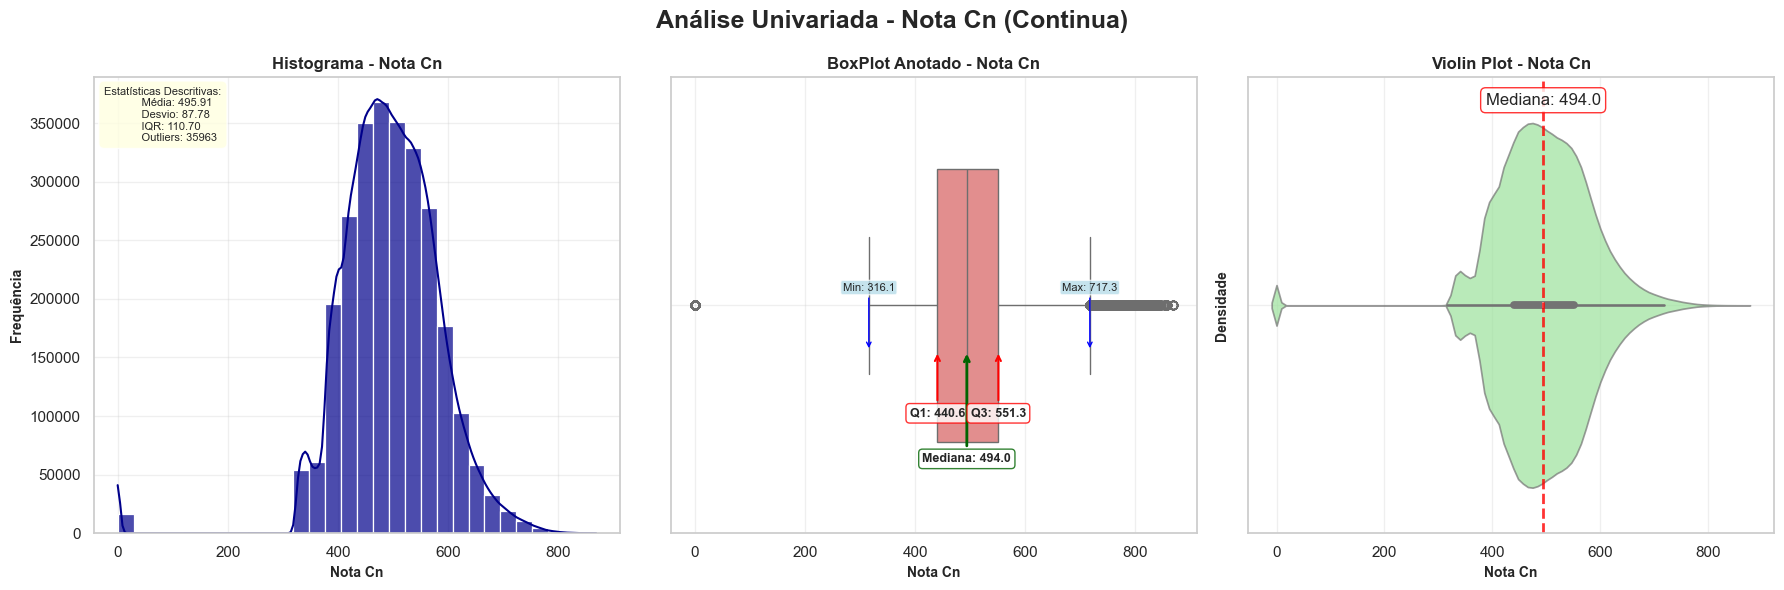

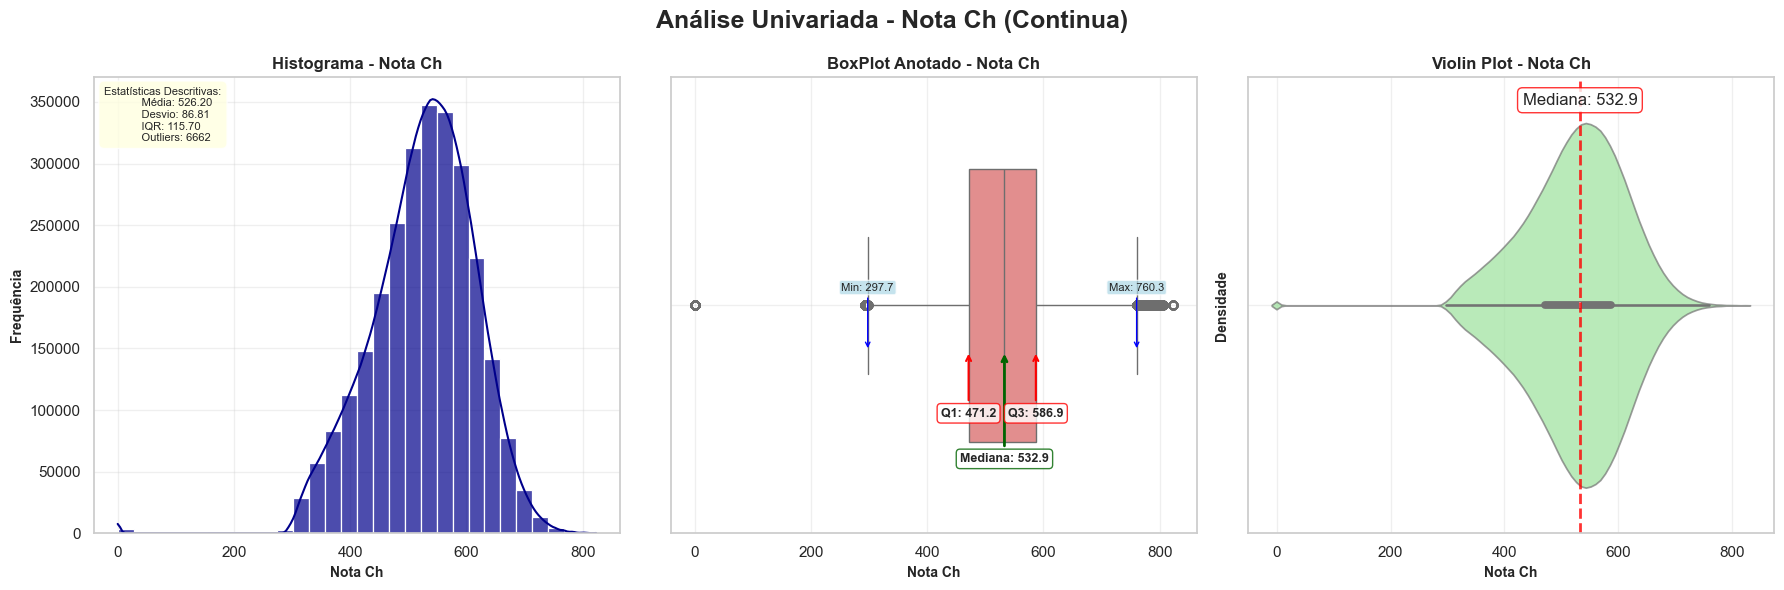

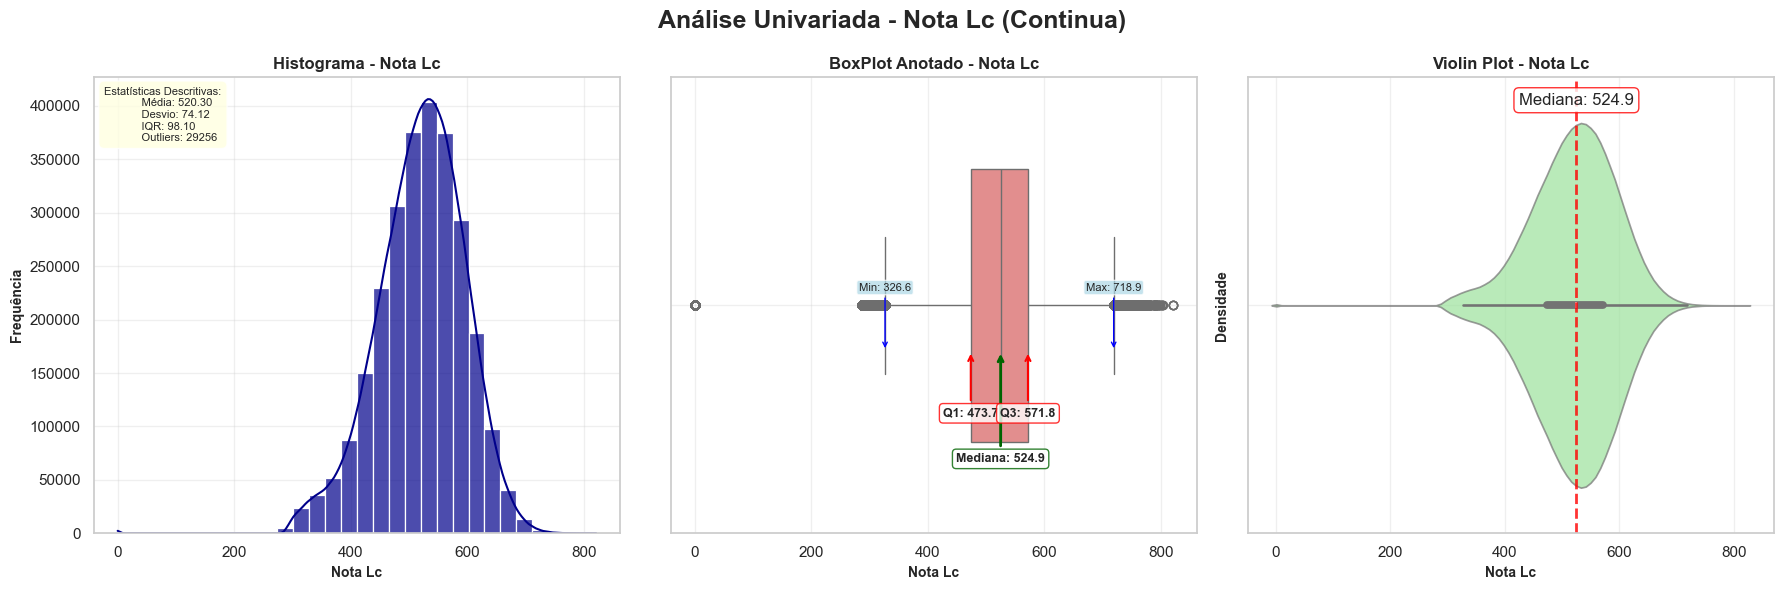

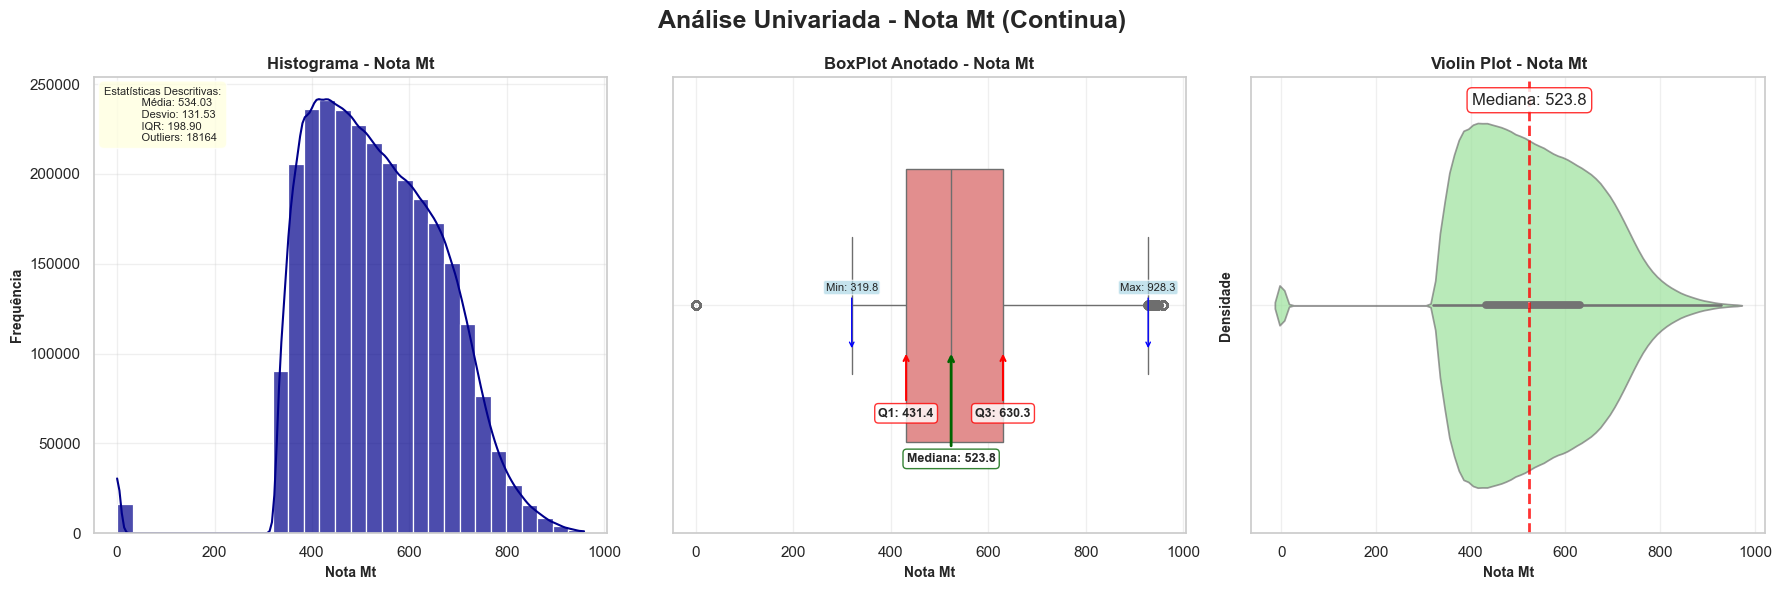

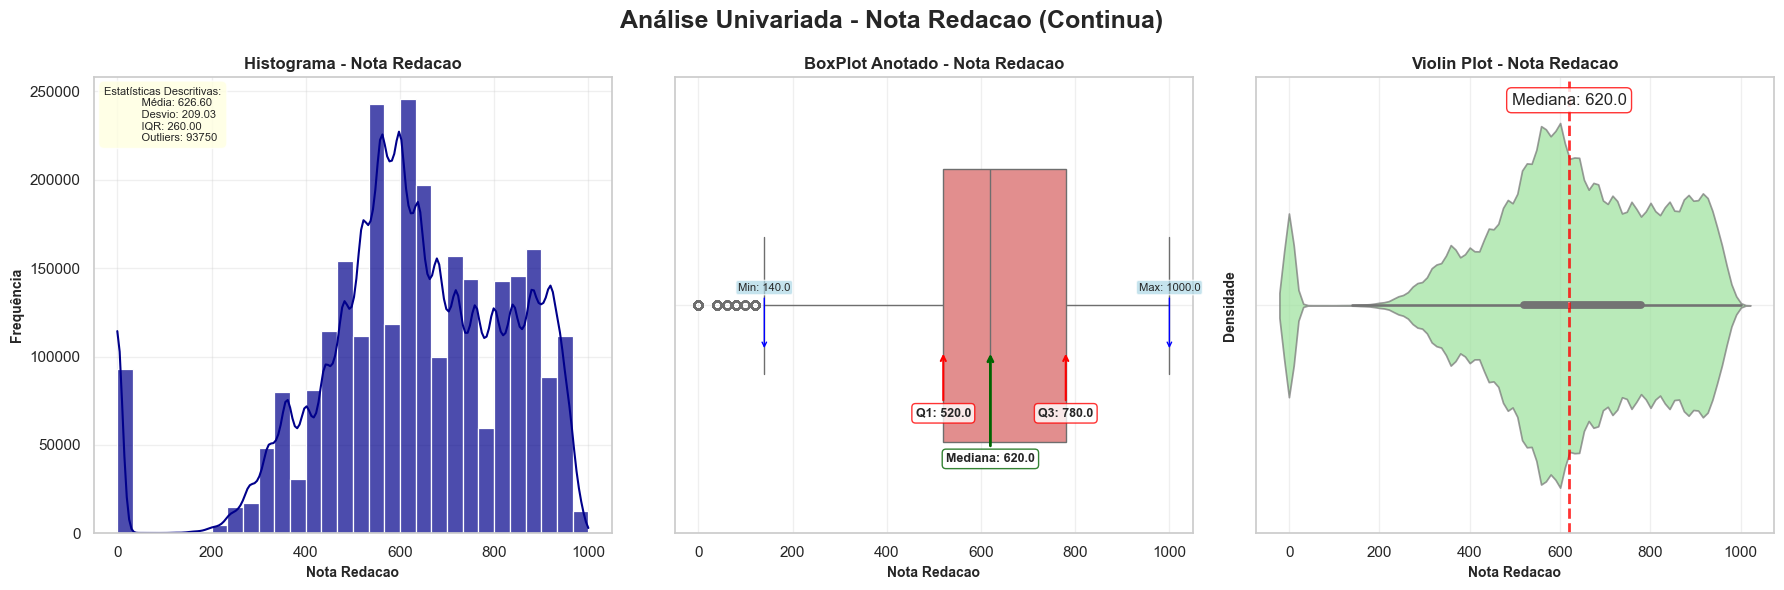

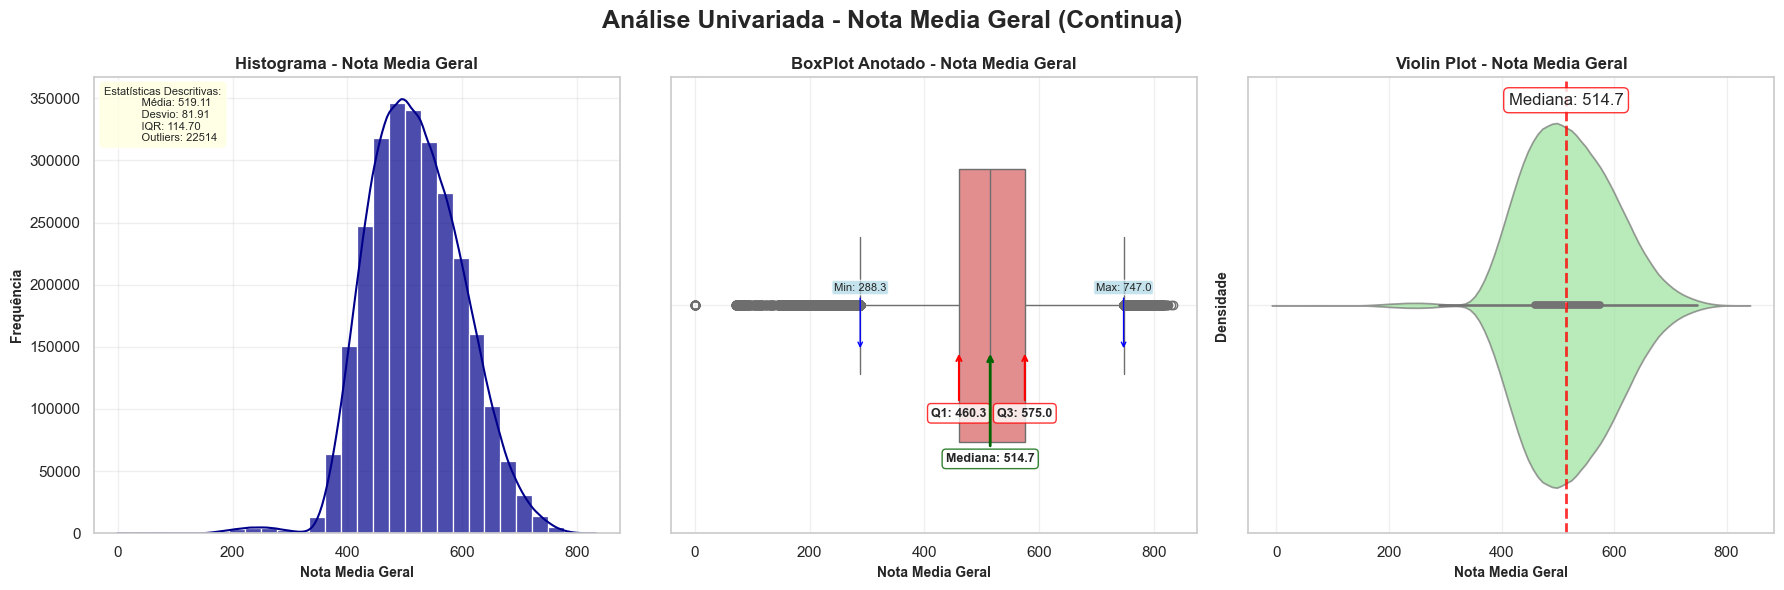

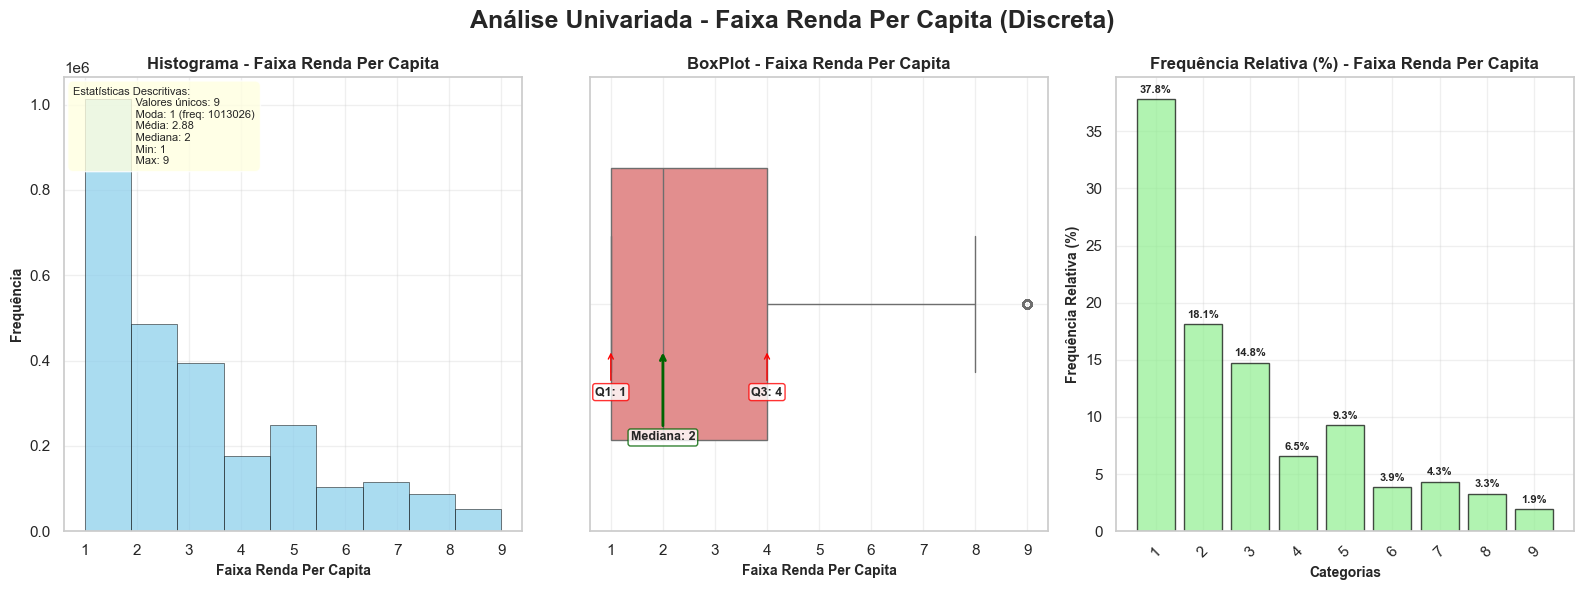

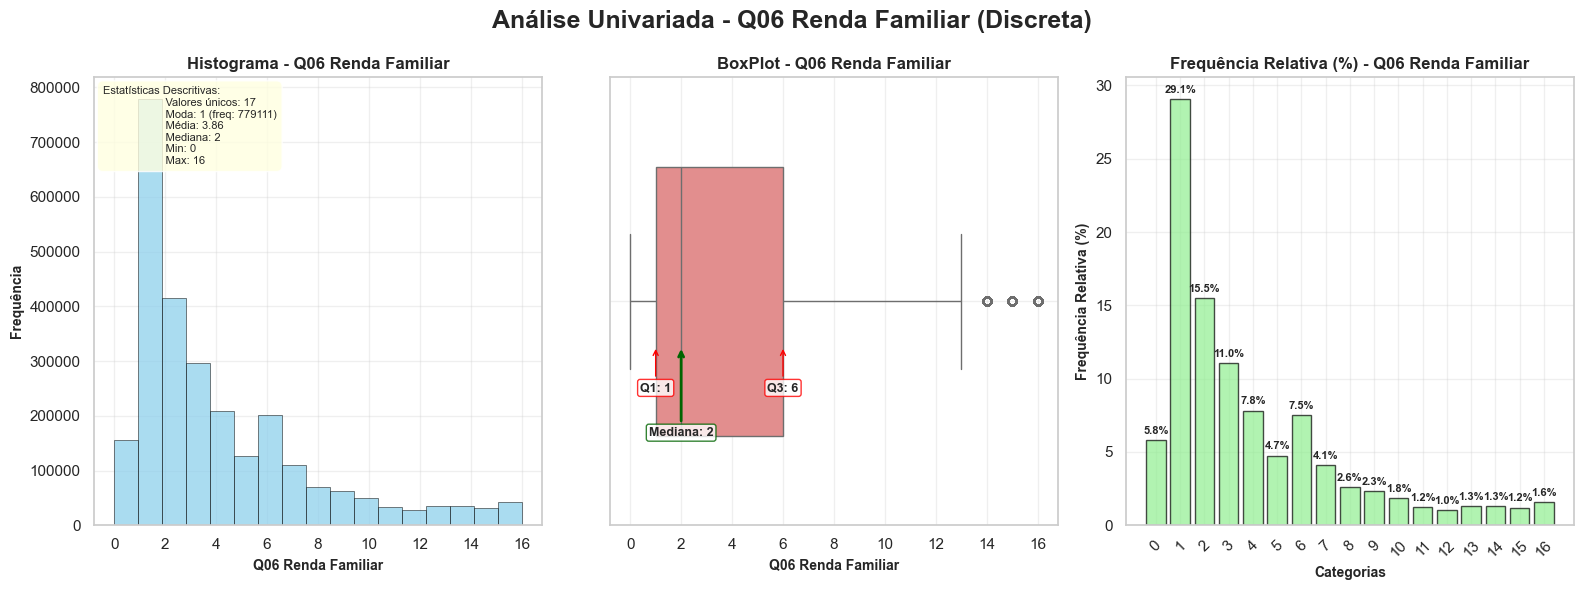

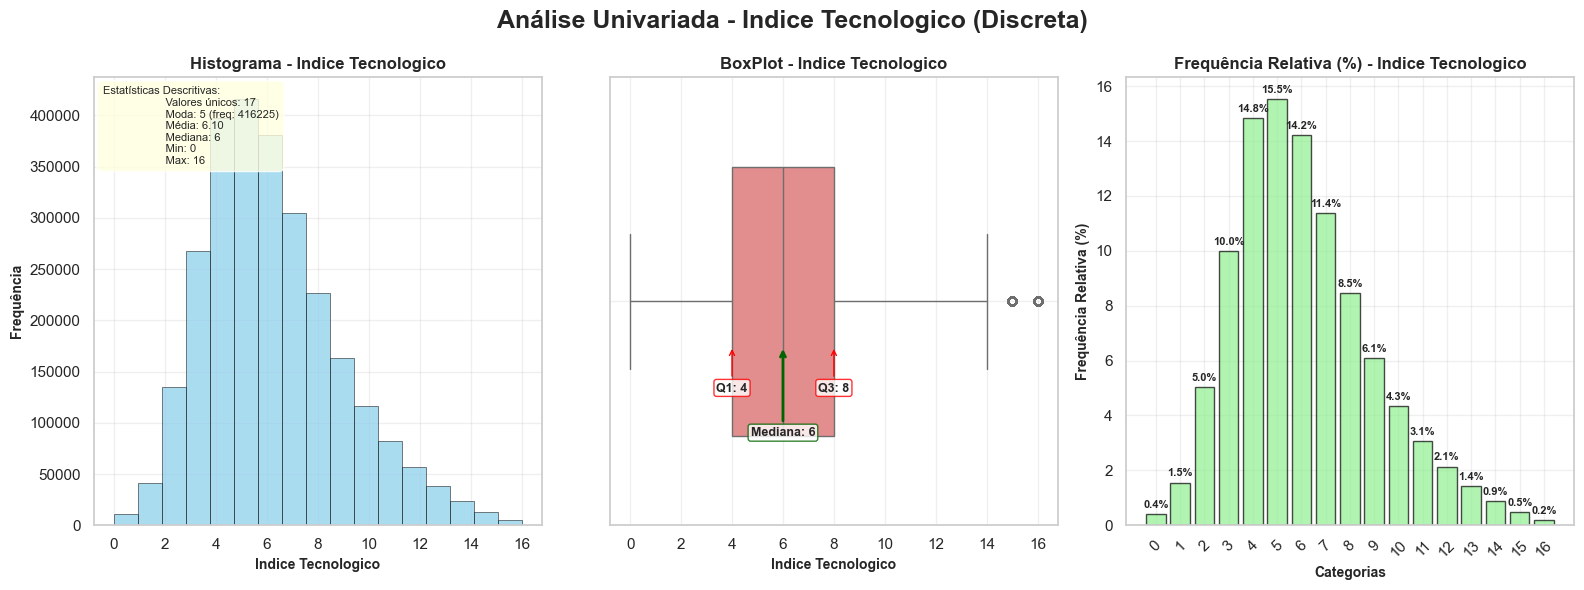

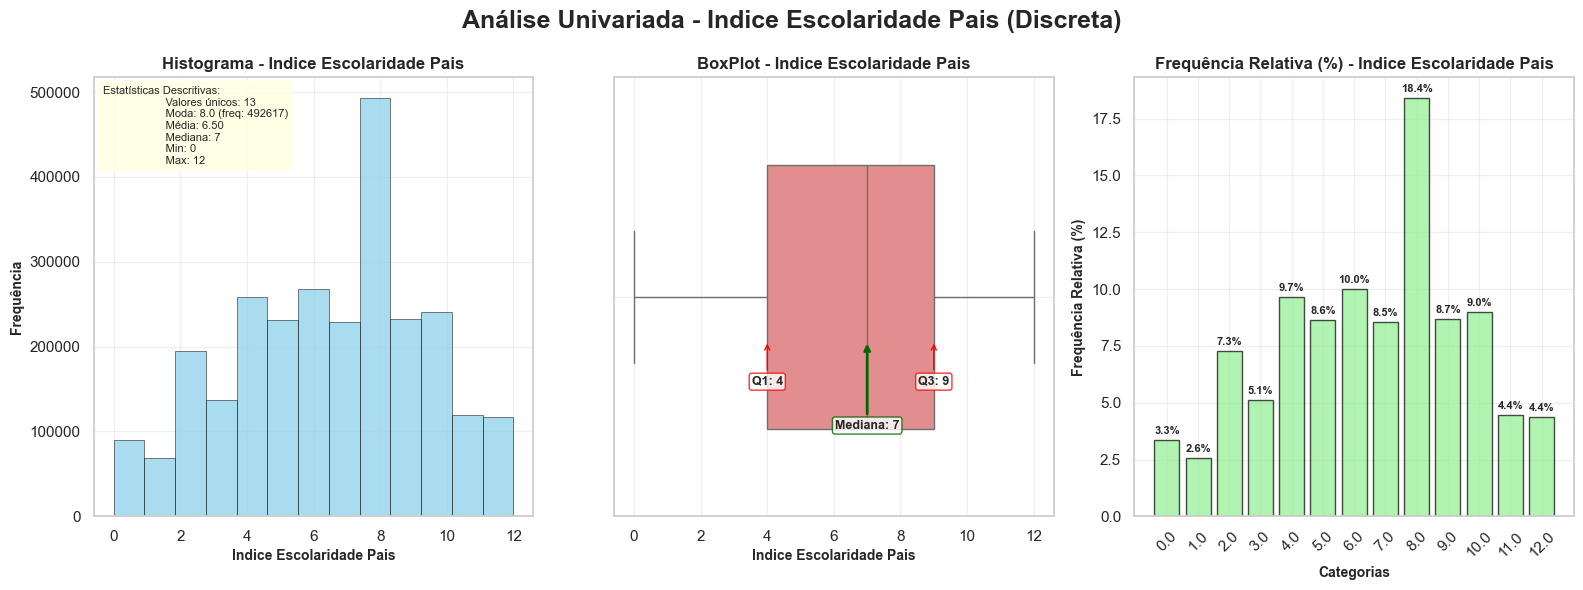

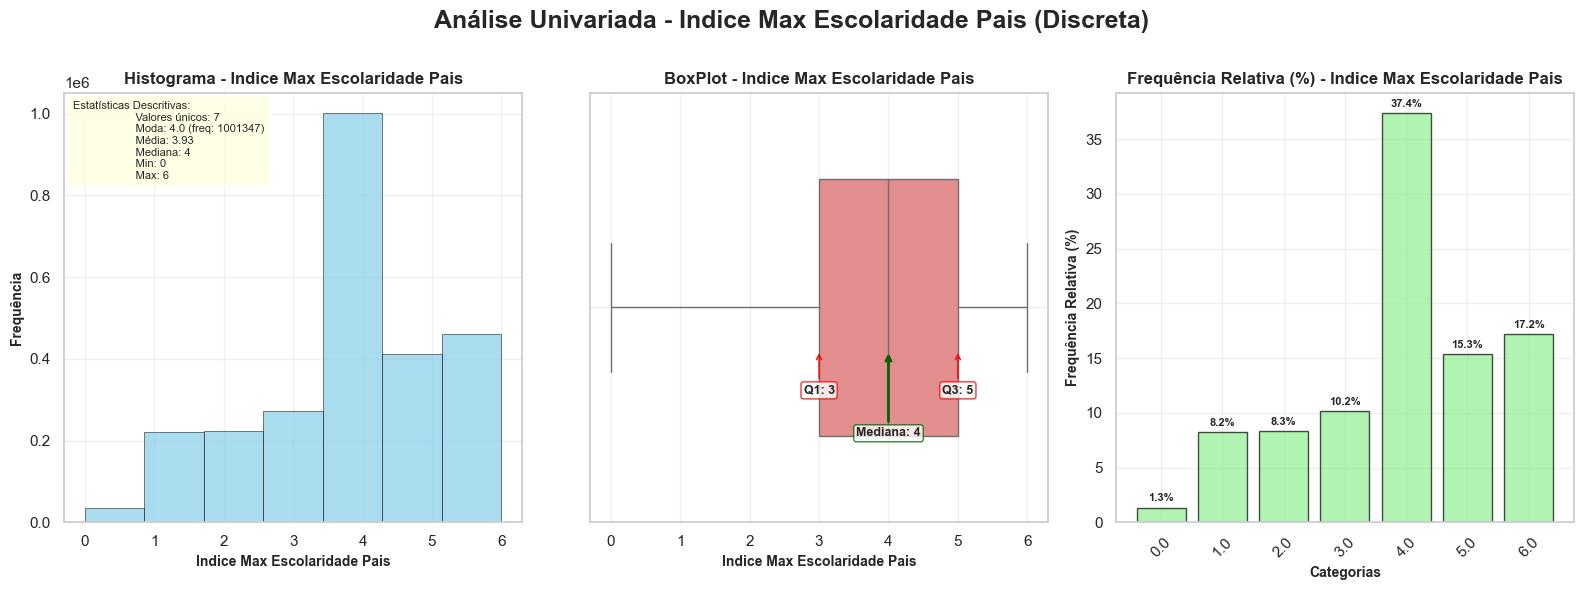

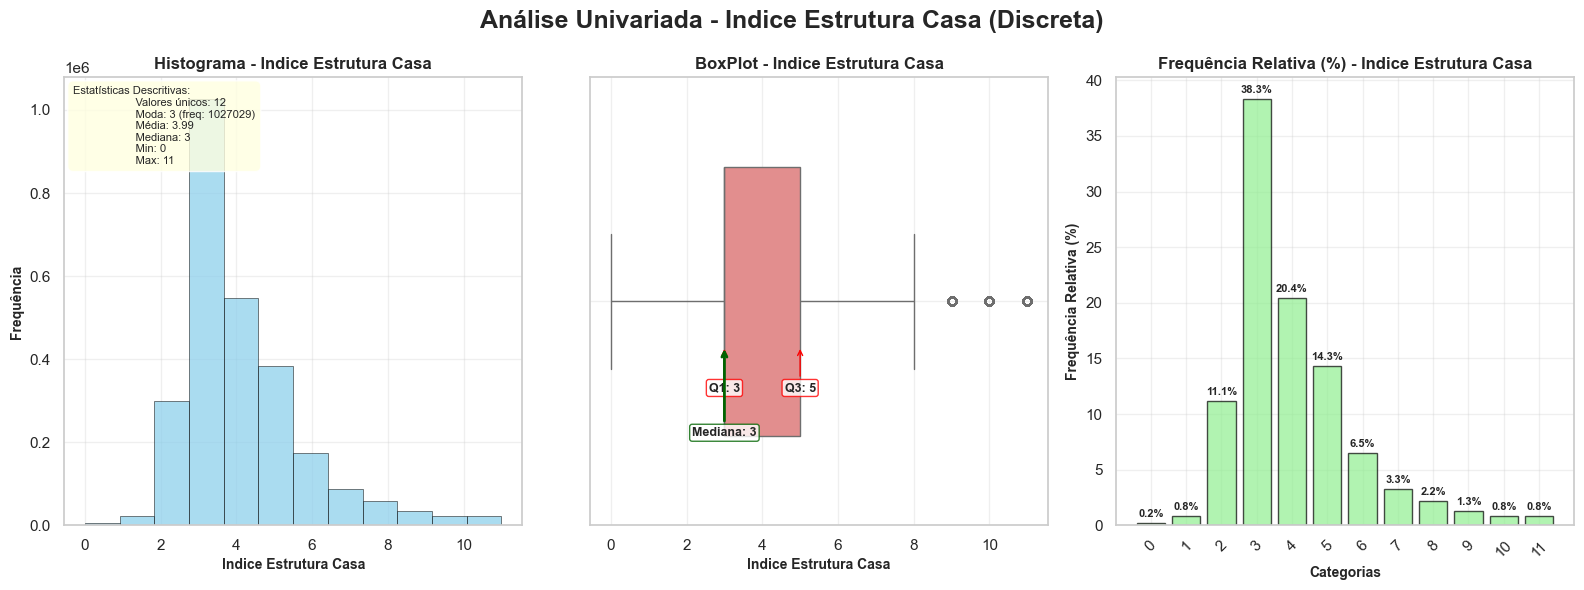

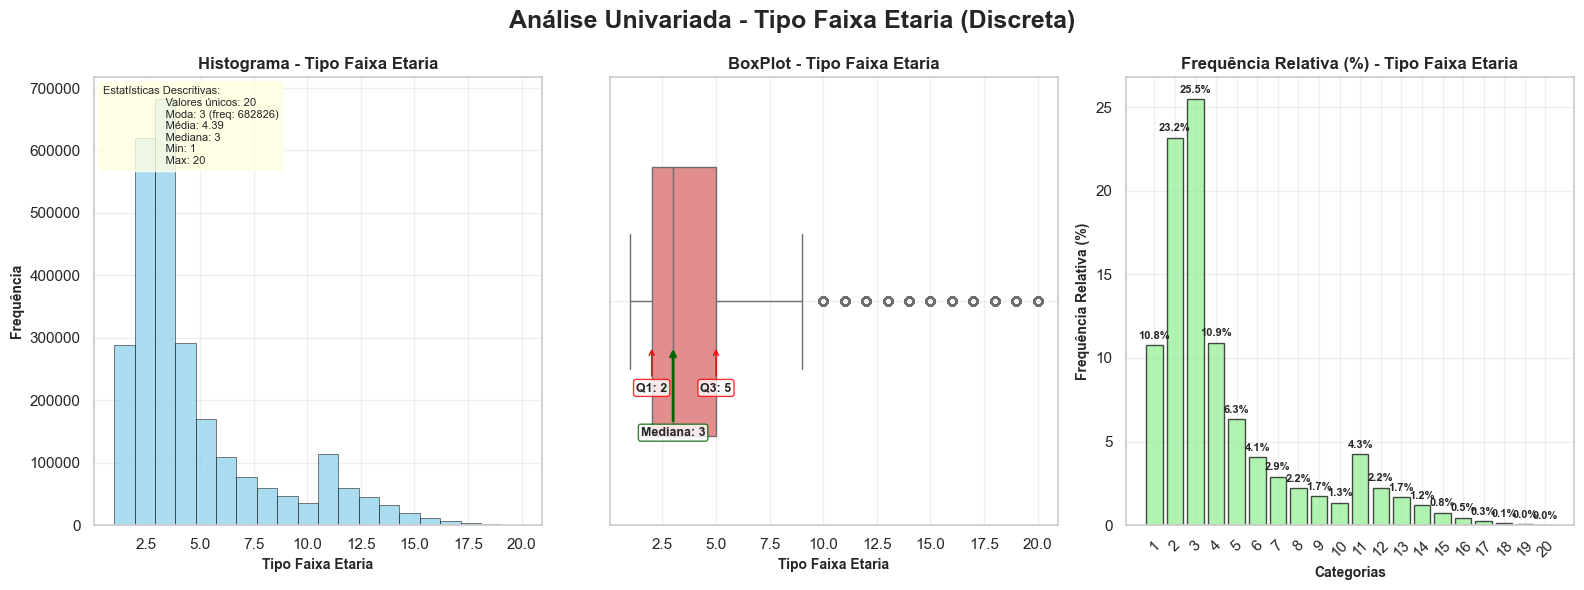

In [31]:
# Analise Univariada

univariate_analysis(col_var_continuas + col_var_discretas, data)

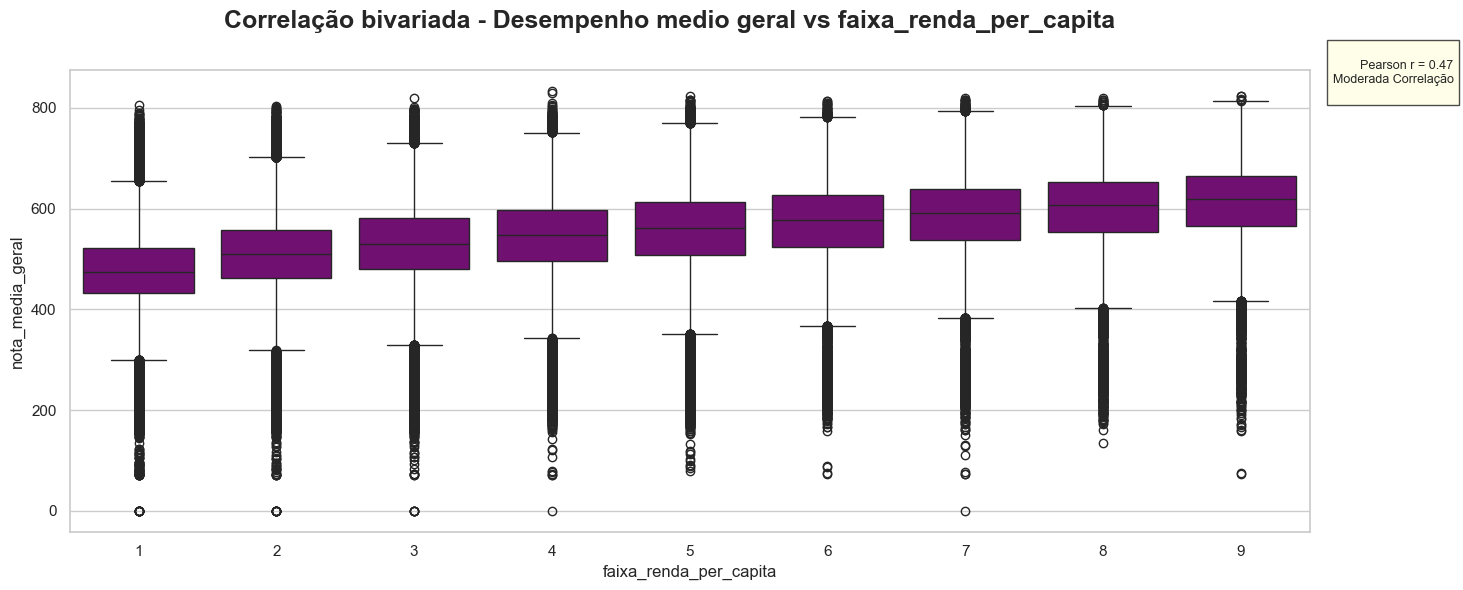

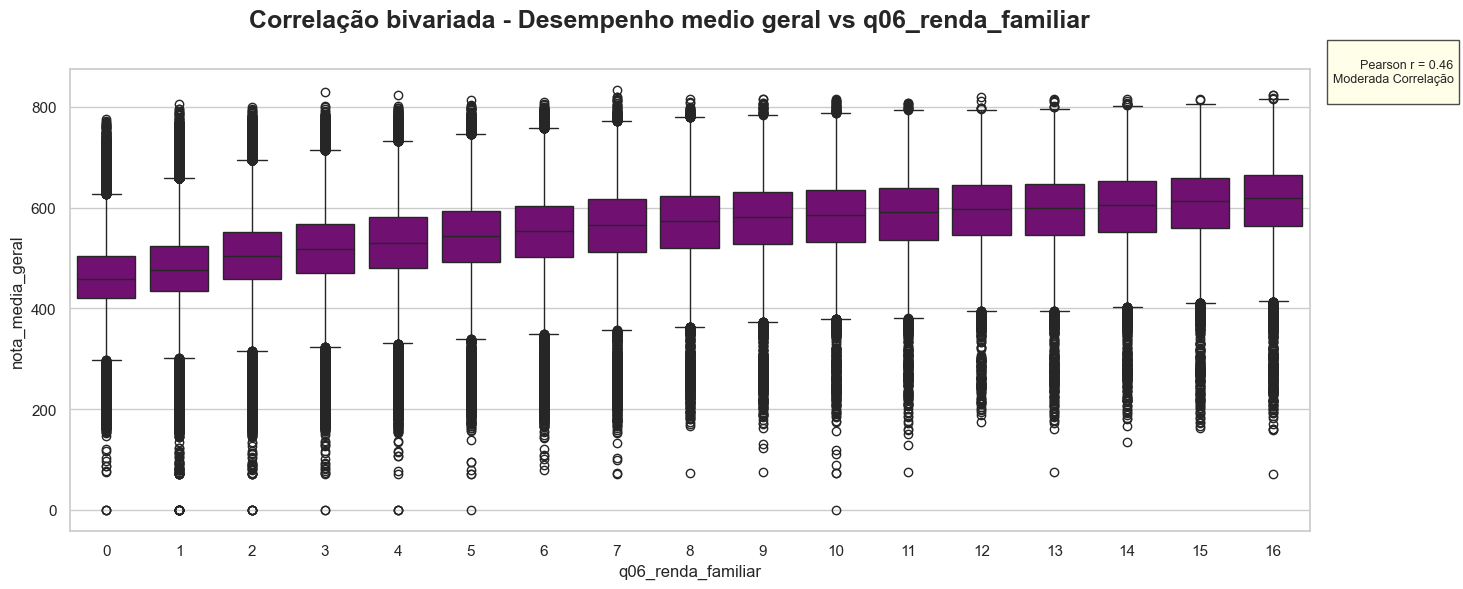

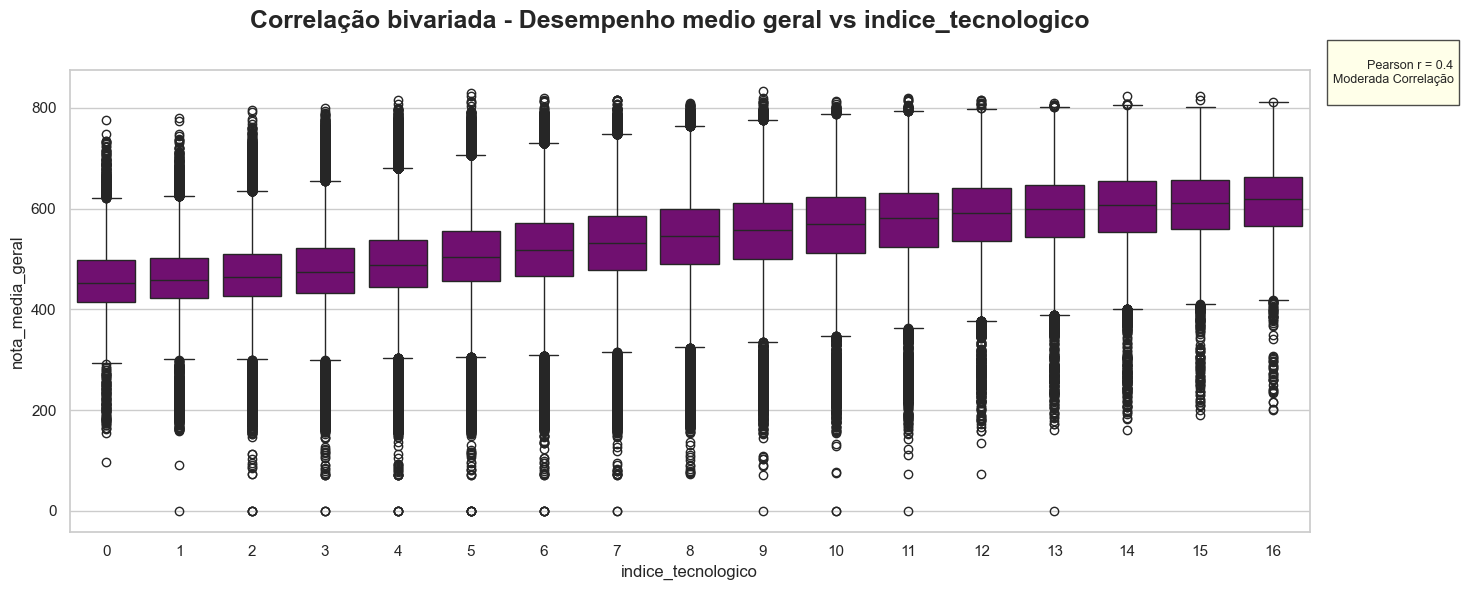

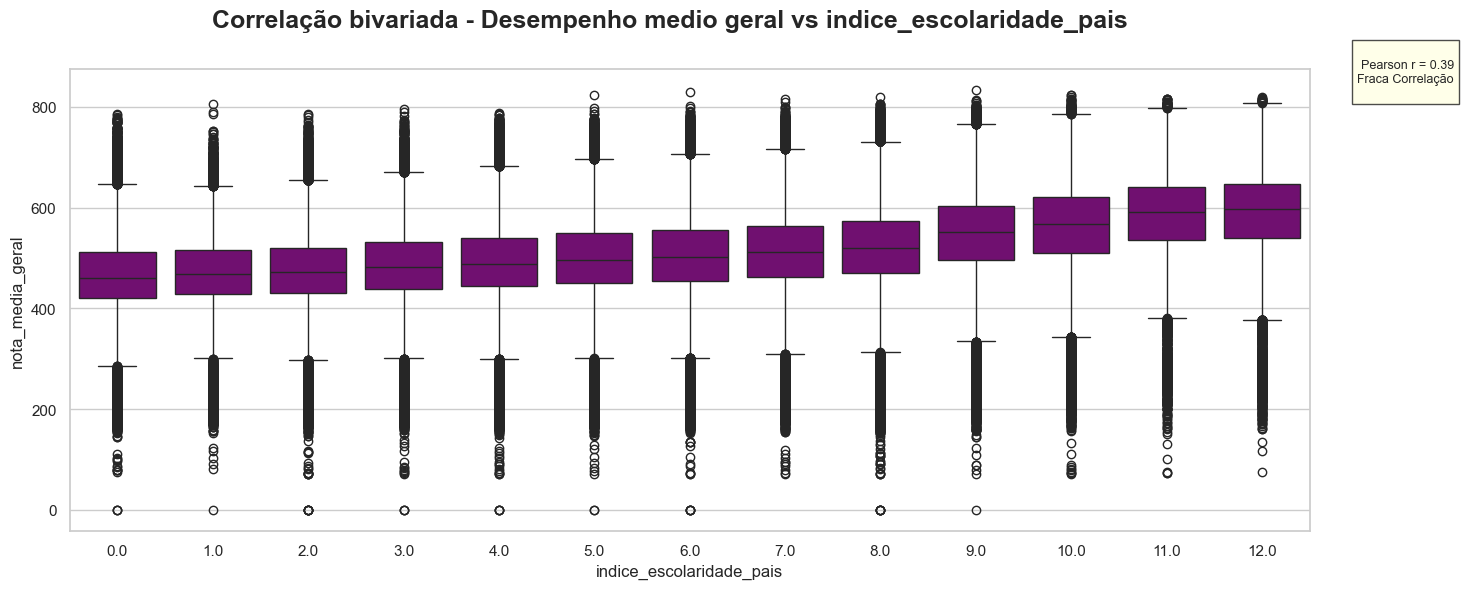

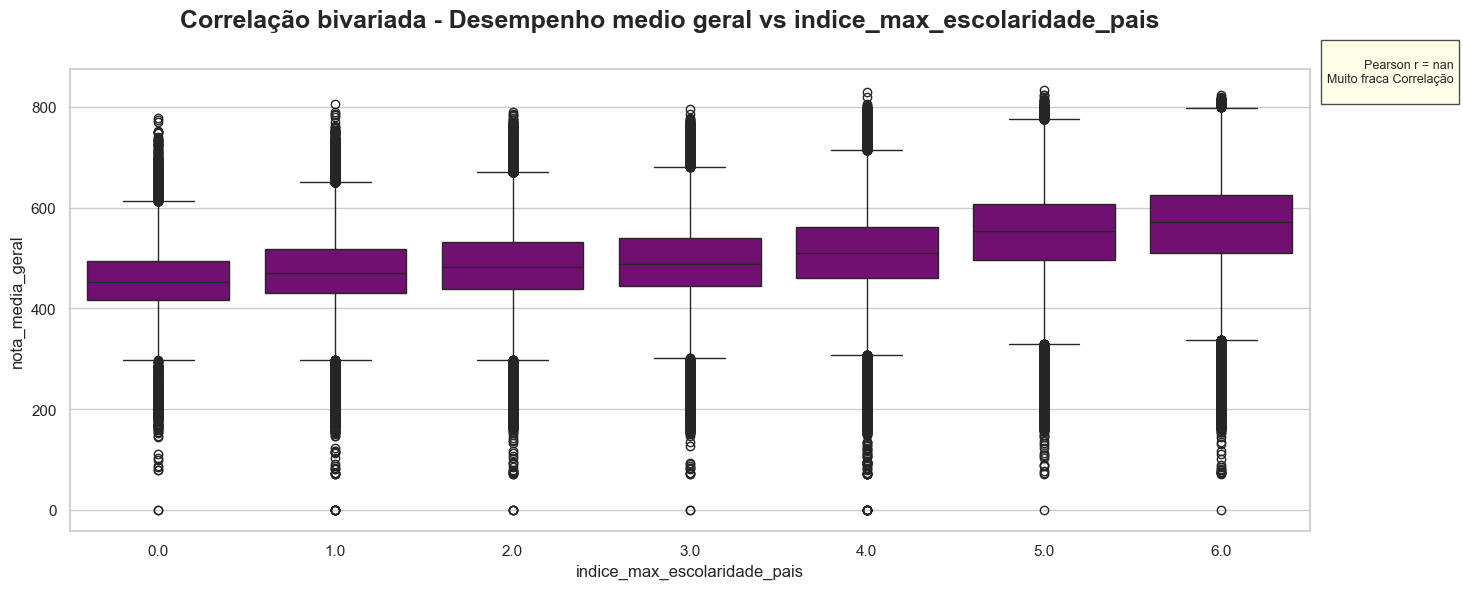

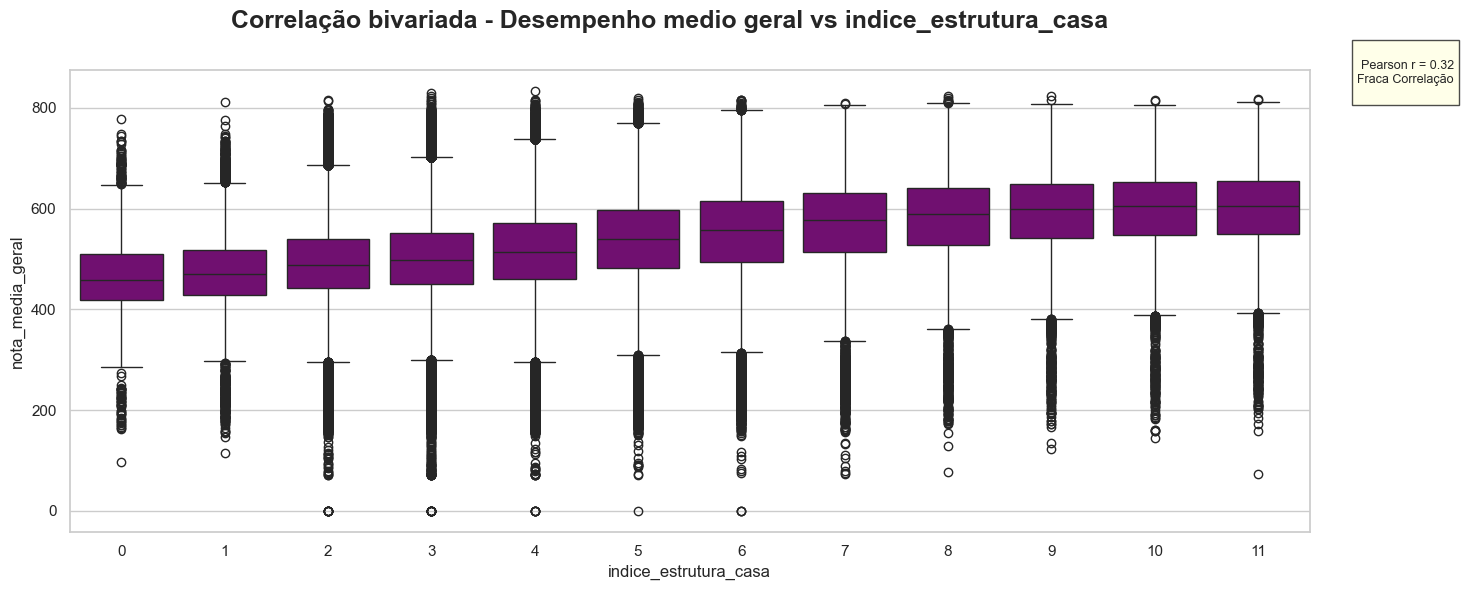

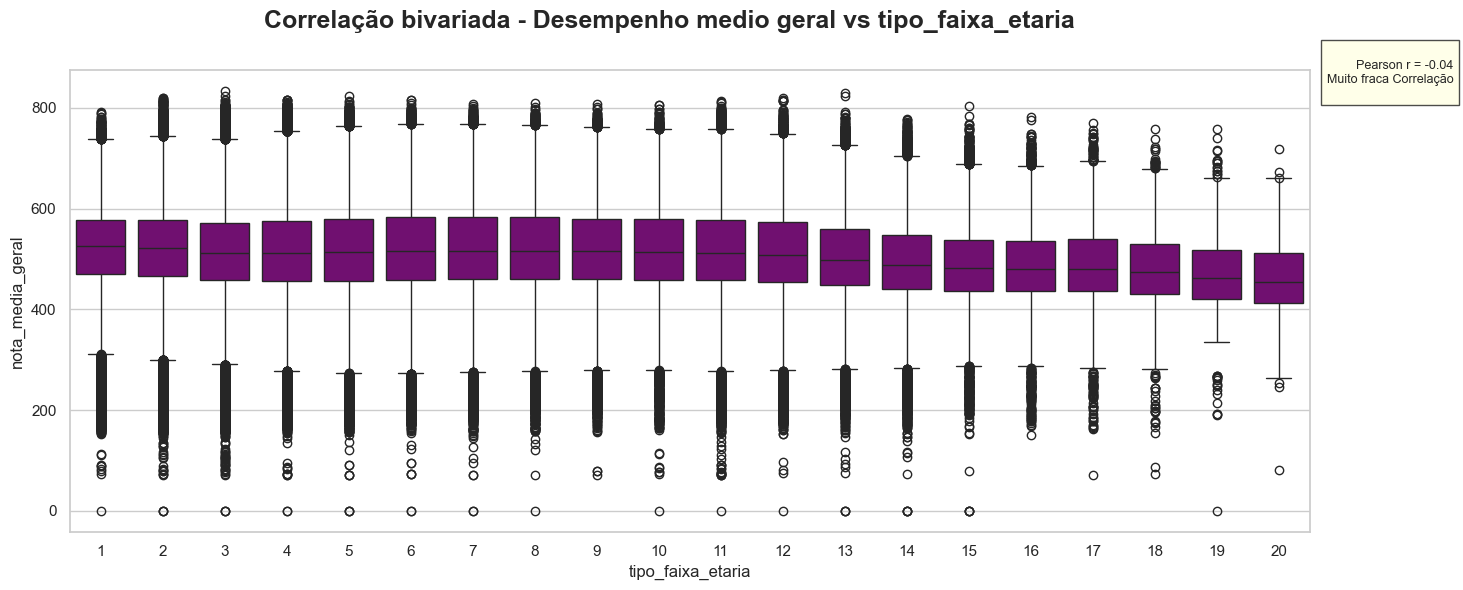

In [32]:
# Analise Bivariada

analysis_bivariate_desempenho(col_var_discretas)

<Axes: >

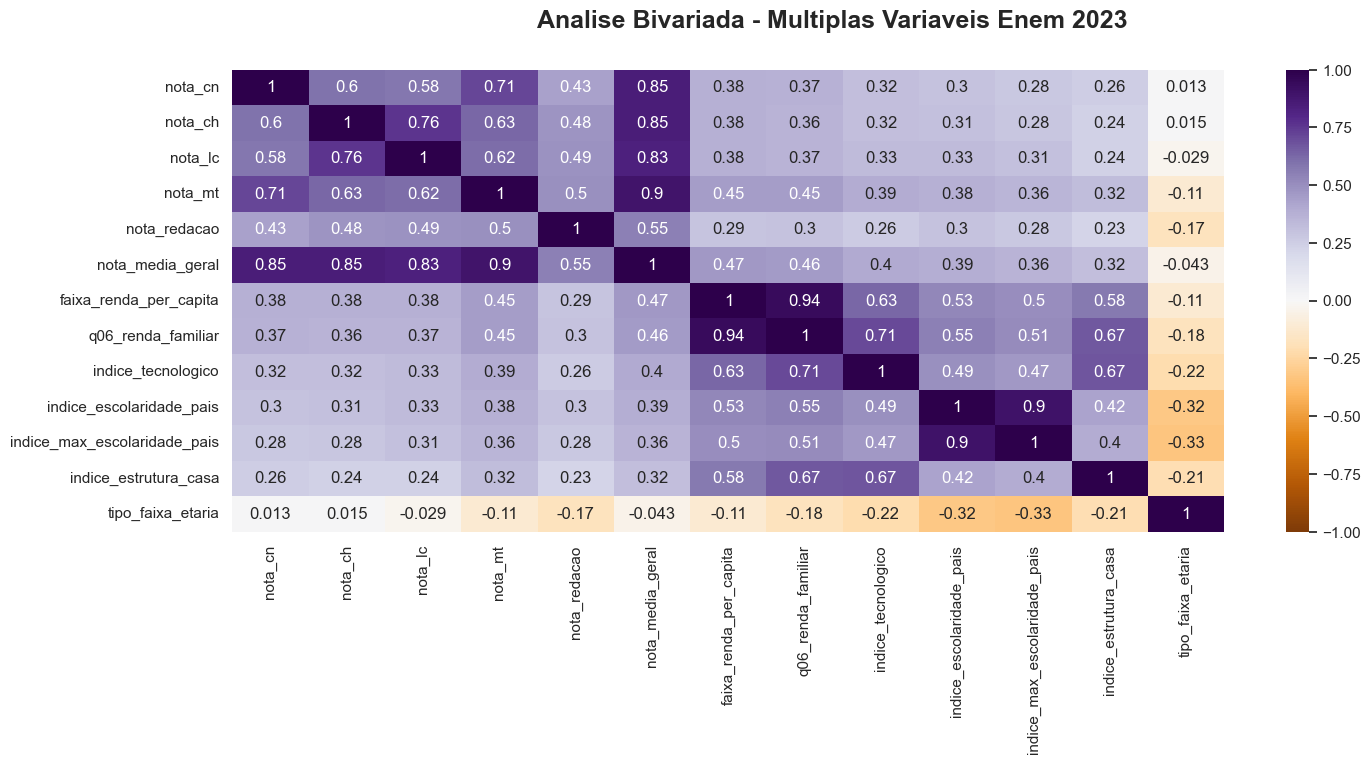

In [37]:
# Analisando a correalçao entre as variaveis em um heatmap

fig, axes= plt.subplots(1,1,figsize=(16,6))

fig.suptitle('Analise Bivariada - Multiplas Variaveis Enem 2023', 
                        fontsize=18, fontweight='bold', y=0.98)

sns.heatmap(
    data=data[col_var_continuas+col_var_discretas].corr('pearson'),
    vmax=1,
    vmin=-1,
    annot=True,
    cmap='PuOr',
    ax=axes
)

C:\Users\Thiag\AppData\Local\Temp\ipykernel_12356\563580762.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Thiag\AppData\Local\Temp\ipykernel_12356\563580762.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Thiag\AppData\Local\Temp\ipykernel_12356\563580762.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Thiag\AppData\Local\Temp\ipykernel_12356\563580762.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Thiag\AppData\Loc

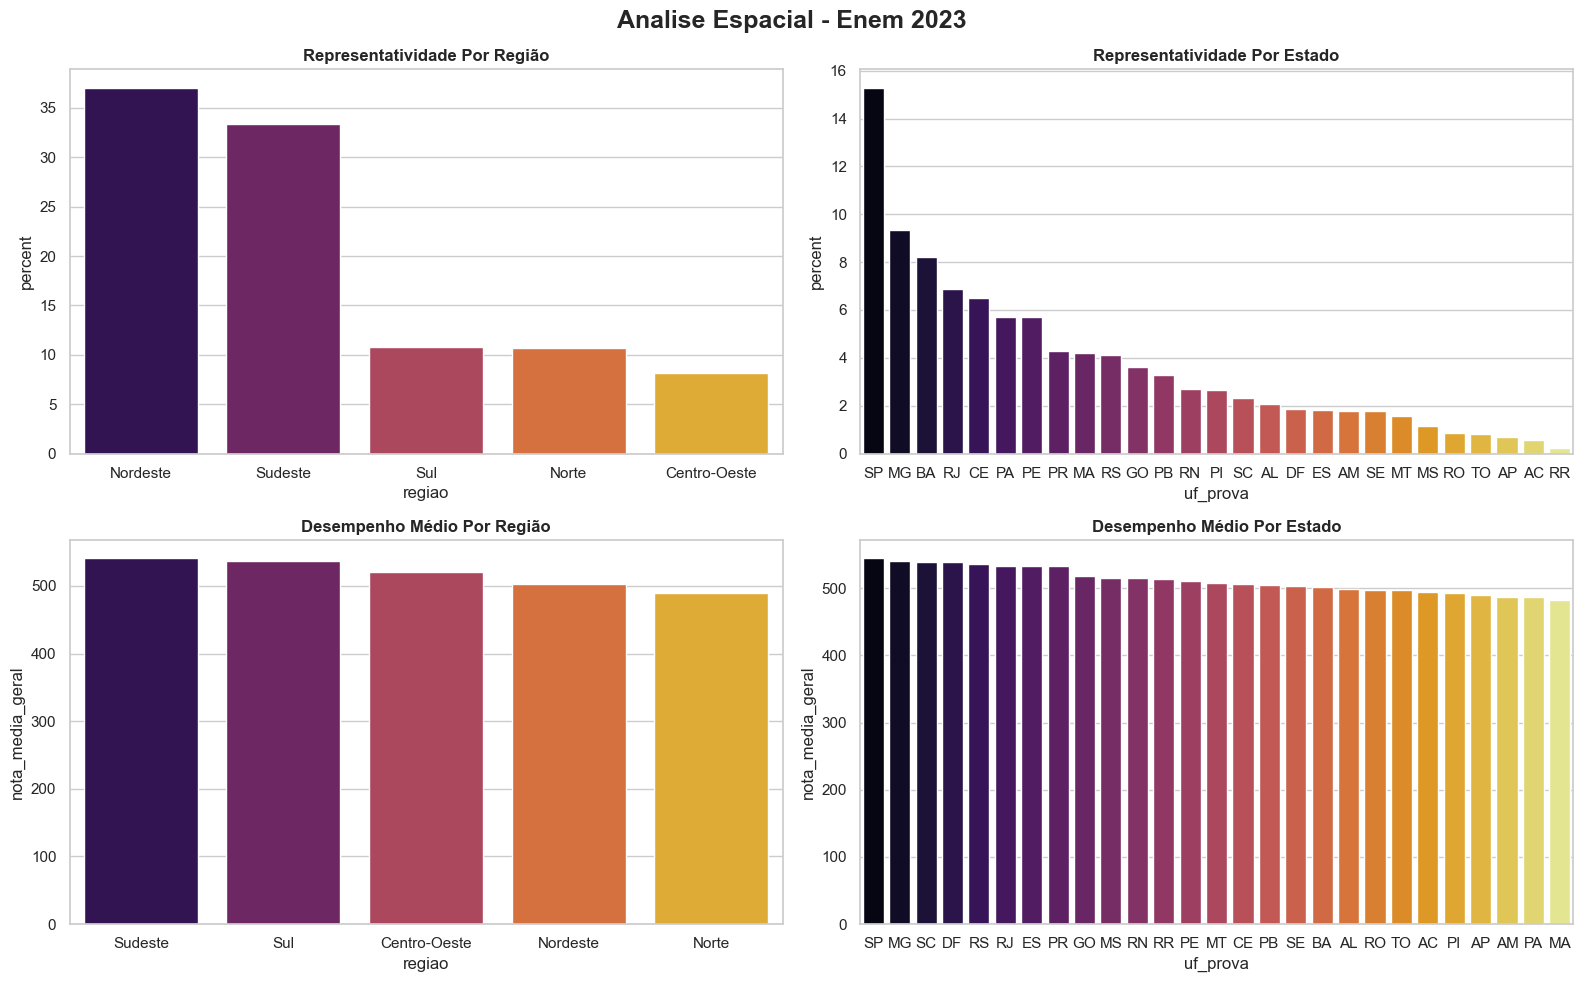

In [34]:
# Craindo figuras e graficos de analise Espacial

fig, axes = plt.subplots(
    2,
    2,
    figsize=(16,10)
)
fig.suptitle('Analise Espacial - Enem 2023', 
                        fontsize=18, fontweight='bold', y=0.98)


axes[0,0].set_title(f'Representatividade Por Região', fontsize=12, fontweight='bold')
axes[0,1].set_title(f'Representatividade Por Estado', fontsize=12, fontweight='bold')
axes[1,0].set_title(f'Desempenho Médio Por Região', fontsize=12, fontweight='bold')
axes[1,1].set_title(f'Desempenho Médio Por Estado', fontsize=12, fontweight='bold')

sns.countplot(
    data=data,
    x='regiao',
    ax=axes[0,0],
    stat='percent',
    order=data['regiao'].value_counts().index,
    palette='inferno'
)

sns.countplot(
    data=data,
    x='uf_prova',
    ax=axes[0,1],
    stat='percent',
    order=data['uf_prova'].value_counts().index,
    palette='inferno'
)

sns.barplot(
    data=data,
    x='regiao',
    y='nota_media_geral',
    ax=axes[1,0],
    order=data.groupby('regiao')['nota_media_geral'].mean().sort_values(ascending=False).index,
    ci=None,
    palette='inferno'
)

sns.barplot(
    data=data,
    x='uf_prova',
    y='nota_media_geral',
    ax=axes[1,1],
    order=data.groupby('uf_prova')['nota_media_geral'].mean().sort_values(ascending=False).index,
    ci=None,
    palette='inferno'
)

plt.tight_layout()

In [36]:
data.groupby('regiao')['nota_media_geral'].mean().sort_values(ascending=False)

regiao
Sudeste        540.85
Sul            536.04
Centro-Oeste   520.61
Nordeste       502.62
Norte          490.12
Name: nota_media_geral, dtype: float64